In [3]:
import numpy as np 
import pandas as pd

In [15]:
df = pd.read_csv('train.csv')

In [16]:
print("\nINFORMAZIONI BASE:")
print(f"Righe totali: {len(df)}")
print(f"Colonne: {list(df.columns)}")


INFORMAZIONI BASE:
Righe totali: 891
Colonne: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
duplicati = df.duplicated()
print(f"\n DUPLICATI: {duplicati.sum()} righe")
if duplicati.sum() > 0:
        print("Righe duplicate:")
        print(df[duplicati])
        df = df.drop_duplicates()
        print("\nRighe dopo eliminazione duplicati:")
        


 DUPLICATI: 0 righe


In [17]:
#check if null
null_values = df.isnull().sum()
print(f"\nValori nulli per colonna:")
print(null_values[null_values > 0])


Valori nulli per colonna:
Age         177
Cabin       687
Embarked      2
dtype: int64


In [18]:
#sostituisci nulli con 0 
df = df.fillna(0)

#check if null
null_values = df.isnull().sum()
print(f"\nValori nulli dopo la sostituzione:")
print(null_values[null_values > 0])


Valori nulli dopo la sostituzione:
Series([], dtype: int64)


In [20]:
df['AgeGroup'] = pd.cut(df['Age'], bins= range(0,85,5), right= False)

age_survival =  df.groupby('AgeGroup').agg(
    Survivalrate=('Survived', 'mean'),
    Count = ('Survived', 'size')
)

print(age_survival)

          Survivalrate  Count
AgeGroup                     
[0, 5)        0.364055    217
[5, 10)       0.500000     22
[10, 15)      0.437500     16
[15, 20)      0.395349     86
[20, 25)      0.342105    114
[25, 30)      0.358491    106
[30, 35)      0.421053     95
[35, 40)      0.458333     72
[40, 45)      0.375000     48
[45, 50)      0.390244     41
[50, 55)      0.437500     32
[55, 60)      0.375000     16
[60, 65)      0.400000     15
[65, 70)      0.000000      4
[70, 75)      0.000000      6
[75, 80)           NaN      0


/tmp/ipykernel_24936/2598711108.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival =  df.groupby('AgeGroup').agg(


In [21]:
df['Faregroup'] = pd.cut(df['Fare'], bins= range(0,512,50), right= False)

Fare_survival =  df.groupby('Faregroup').agg(
    Survivalrate=('Survived', 'mean'),
    Count = ('Survived', 'size')
)

print(Fare_survival)

            Survivalrate  Count
Faregroup                      
[0, 50)         0.319178    730
[50, 100)       0.648148    108
[100, 150)      0.791667     24
[150, 200)      0.666667      9
[200, 250)      0.636364     11
[250, 300)      0.666667      6
[300, 350)           NaN      0
[350, 400)           NaN      0
[400, 450)           NaN      0
[450, 500)           NaN      0


/tmp/ipykernel_24936/494769982.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Fare_survival =  df.groupby('Faregroup').agg(


In [22]:
pclass_survival = df.groupby('Pclass')['Survived'].mean()
print("Survival Rate by Pclass:\n", pclass_survival)

sex_survival = df.groupby('Sex')['Survived'].mean()
print("\nSurvival Rate by Sex:\n", sex_survival)

embarked_survival = df.groupby('Embarked')['Survived'].mean()
print("\nSurvival Rate by Embarked:\n", embarked_survival)

sibsp_survival = df.groupby('SibSp')['Survived'].mean()
print("\nSurvival Rate by SibSp:\n", sibsp_survival)

parch_survival = df.groupby('Parch')['Survived'].mean()
print("\nSurvival Rate by Parch:\n", parch_survival)

Survival Rate by Pclass:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival Rate by Sex:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival Rate by Embarked:
 Embarked
0    1.000000
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

Survival Rate by SibSp:
 SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

Survival Rate by Parch:
 Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

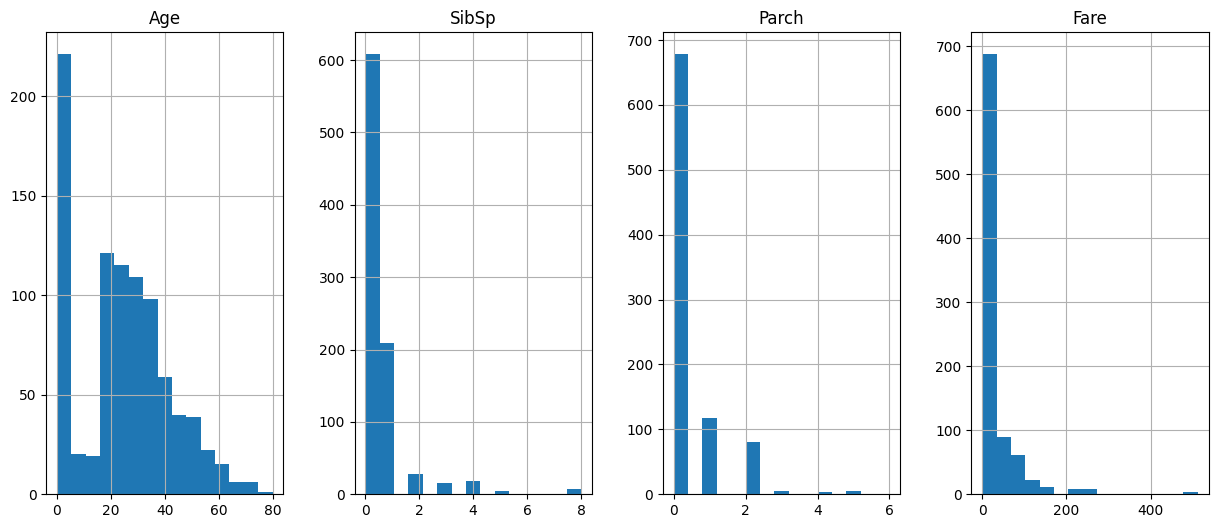

In [24]:
import matplotlib.pyplot as plt
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']

df[numerical_features].hist(bins=15, figsize=(15, 6), layout=(1, 4))

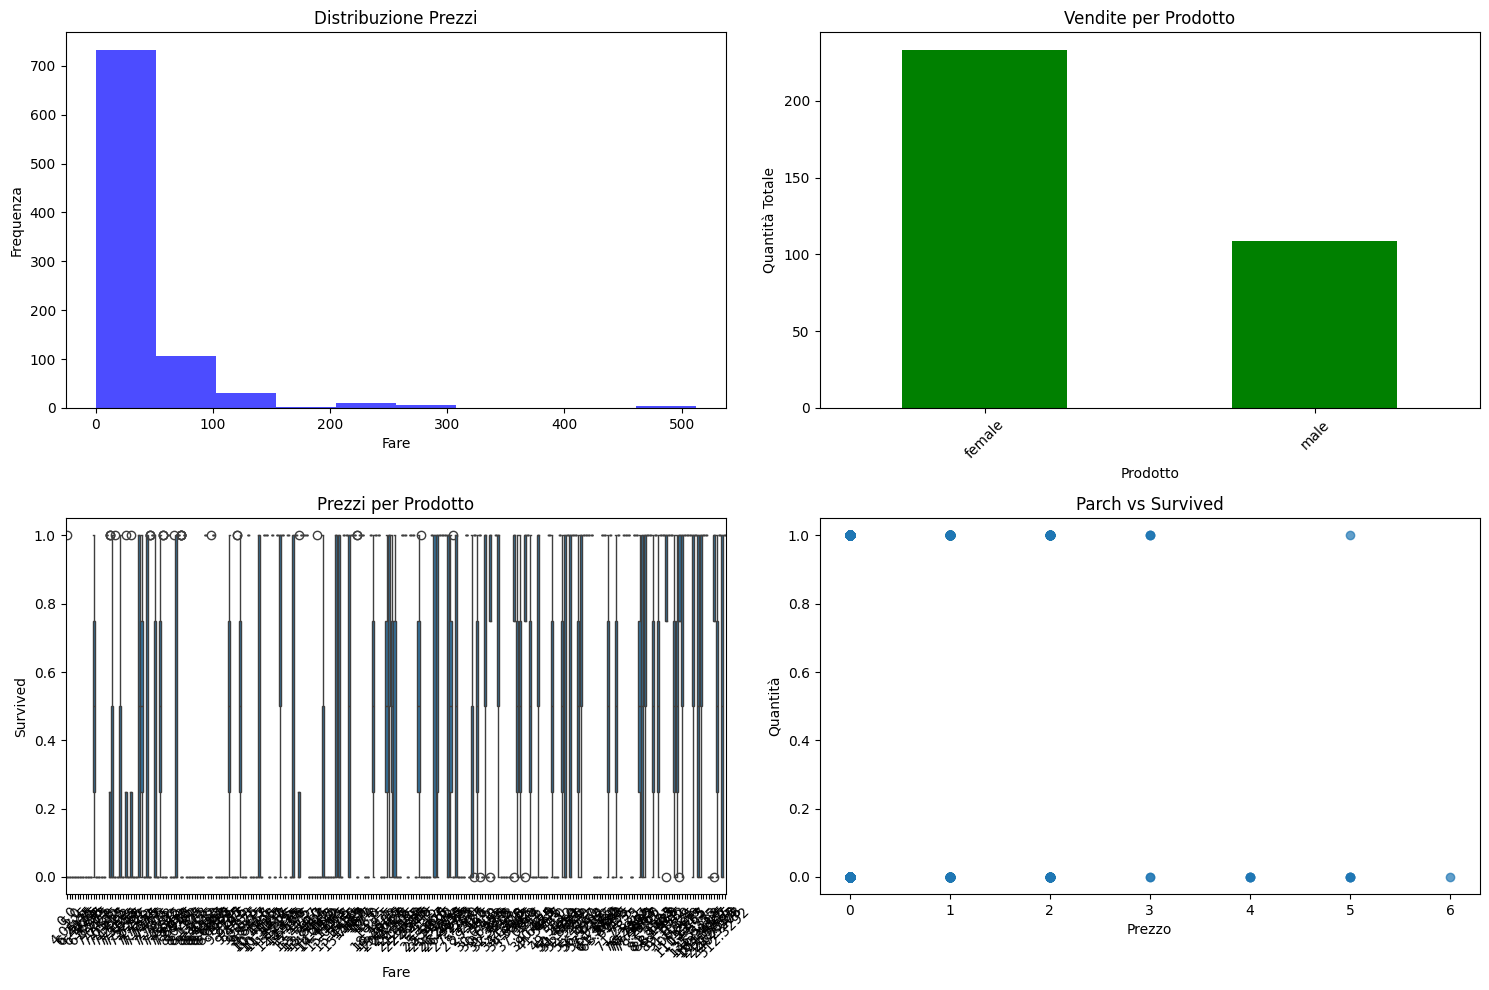

In [29]:
import seaborn as sns



plt.figure(figsize=(15,10))

# 1. Distribuzione dei Prezzi
plt.subplot(2,2,1)
plt.hist(df['Fare'].dropna(), bins=10, color='blue', alpha=0.7)
plt.title('Distribuzione Prezzi')
plt.xlabel('Fare')
plt.ylabel('Frequenza')

# 2. Vendite per Prodotto
plt.subplot(2,2,2)
df.groupby('Sex')['Survived'].sum().plot(kind='bar', color='green')
plt.title('Vendite per Prodotto')
plt.xlabel('Prodotto')
plt.ylabel('Quantità Totale')
plt.xticks(rotation=45)

# 3. Boxplot Prezzi per Prodotto
plt.subplot(2,2,3)
sns.boxplot(x='Fare', y='Survived', data=df)
plt.title('Prezzi per Prodotto')
plt.xticks(rotation=45)

# 4. Scatter Prezzo vs Quantità
plt.subplot(2,2,4)
plt.scatter(df['Parch'], df['Survived'], alpha=0.7)
plt.title('Parch vs Survived')
plt.xlabel('Prezzo')
plt.ylabel('Quantità')

plt.tight_layout()
plt.show()